In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import requests
import os
import datetime

from lts import LTSCell

2023-09-10 12:57:37.396140: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-10 12:57:38.300369: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-09-10 12:57:38.300486: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/loca

In [2]:
url = 'http://api.scraperlink.com/investpy/?email=your@email.com&type=historical_data&product=cryptos&symbol=BTC&from_date=10/01/2013&to_date=8/1/2023'
response = requests.request('GET', url)
prices = response.json()['data']
data = pd.DataFrame(prices)

In [3]:
data.head()

,direction_color,rowDate,rowDateRaw,rowDateTimestamp,last_close,last_open,last_max,last_min,volume,volumeRaw,change_precent,last_closeRaw,last_openRaw,last_maxRaw,last_minRaw,change_precentRaw
0,greenFont,"Aug 01, 2023",1690848000,2023-08-01T00:00:00Z,"29,712.2","29,232.3","29,712.2","28,611.0",64.01K,64006,1.64,29712.16796875000000,29232.25390625000000,29712.16796875000000,28611.04687500000000,1.641259
1,redFont,"Jul 31, 2023",1690761600,2023-07-31T00:00:00Z,"29,232.4","29,282.0","29,502.3","29,128.3",31.84K,31839,-0.17,29232.38867187500000,29282.01953125000000,29502.28125000000000,29128.27539062500000,-0.168507
2,redFont,"Jul 30, 2023",1690675200,2023-07-30T00:00:00Z,"29,281.7","29,354.2","29,446.6","29,054.5",20.58K,20584,-0.24,29281.73046875000000,29354.15820312500000,29446.58984375000000,29054.48632812500000,-0.244534
3,greenFont,"Jul 29, 2023",1690588800,2023-07-29T00:00:00Z,"29,353.5","29,315.0","29,400.1","29,256.9",13.90K,13895,0.13,29353.50976562500000,29315.02343750000000,29400.10351562500000,29256.91015625000000,0.131285
4,greenFont,"Jul 28, 2023",1690502400,2023-07-28T00:00:00Z,"29,315.0","29,222.7","29,533.0","29,125.1",31.42K,31422,0.32,29315.02343750000000,29222.72460937500000,29533.03320312500000,29125.13281250000000,0.315846


In [4]:
# Remove unnecessary columns
data.drop(columns=[
  'direction_color',
  'rowDateRaw',
  'rowDateTimestamp',

  # Quantity of btc bought or sold
  'volume',
  'volumeRaw',
  'change_precent',
  'change_precentRaw',
  'last_close',
  'last_open',
  'last_max',
  'last_min'
  ],
  inplace=True
)

data.head()

,rowDate,last_closeRaw,last_openRaw,last_maxRaw,last_minRaw
0,"Aug 01, 2023",29712.16796875000000,29232.25390625000000,29712.16796875000000,28611.04687500000000
1,"Jul 31, 2023",29232.38867187500000,29282.01953125000000,29502.28125000000000,29128.27539062500000
2,"Jul 30, 2023",29281.73046875000000,29354.15820312500000,29446.58984375000000,29054.48632812500000
3,"Jul 29, 2023",29353.50976562500000,29315.02343750000000,29400.10351562500000,29256.91015625000000
4,"Jul 28, 2023",29315.02343750000000,29222.72460937500000,29533.03320312500000,29125.13281250000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3592 entries, 0 to 3591
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rowDate        3592 non-null   object
 1   last_closeRaw  3592 non-null   object
 2   last_openRaw   3592 non-null   object
 3   last_maxRaw    3592 non-null   object
 4   last_minRaw    3592 non-null   object
dtypes: object(5)
memory usage: 140.4+ KB


In [6]:
data.isnull().sum()

rowDate          0
last_closeRaw    0
last_openRaw     0
last_maxRaw      0
last_minRaw      0
dtype: int64

In [7]:
# Convert date object to datetime
data['rowDate'] = pd.to_datetime(data['rowDate'])

# Convert values to floats
data = data.astype({
    'last_closeRaw': 'float',
    'last_openRaw': 'float',
    'last_maxRaw': 'float',
    'last_minRaw': 'float'
})

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3592 entries, 0 to 3591
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   rowDate        3592 non-null   datetime64[ns]
 1   last_closeRaw  3592 non-null   float64       
 2   last_openRaw   3592 non-null   float64       
 3   last_maxRaw    3592 non-null   float64       
 4   last_minRaw    3592 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 140.4 KB


In [9]:
data.head()

,rowDate,last_closeRaw,last_openRaw,last_maxRaw,last_minRaw
0,2023-08-01,29712.167969,29232.253906,29712.167969,28611.046875
1,2023-07-31,29232.388672,29282.019531,29502.281250,29128.275391
2,2023-07-30,29281.730469,29354.158203,29446.589844,29054.486328
3,2023-07-29,29353.509766,29315.023438,29400.103516,29256.910156
4,2023-07-28,29315.023438,29222.724609,29533.033203,29125.132812


In [10]:
data.rename(
    columns={
        'last_closeRaw': 'close',
        'last_openRaw': 'open',
        'last_maxRaw': 'high',
        'last_minRaw': 'low',
        'rowDate': 'Date'
    },
    inplace=True
)

In [11]:
data.head()

,Date,close,open,high,low
0,2023-08-01,29712.167969,29232.253906,29712.167969,28611.046875
1,2023-07-31,29232.388672,29282.019531,29502.281250,29128.275391
2,2023-07-30,29281.730469,29354.158203,29446.589844,29054.486328
3,2023-07-29,29353.509766,29315.023438,29400.103516,29256.910156
4,2023-07-28,29315.023438,29222.724609,29533.033203,29125.132812


In [12]:
data.set_index('Date', inplace=True)

In [13]:
btc_prices = pd.DataFrame(data['close']).rename(columns={ 'close': 'Price' })

In [14]:
btc_prices.head()

,Price
Date,
2023-08-01,29712.167969
2023-07-31,29232.388672
2023-07-30,29281.730469
2023-07-29,29353.509766
2023-07-28,29315.023438


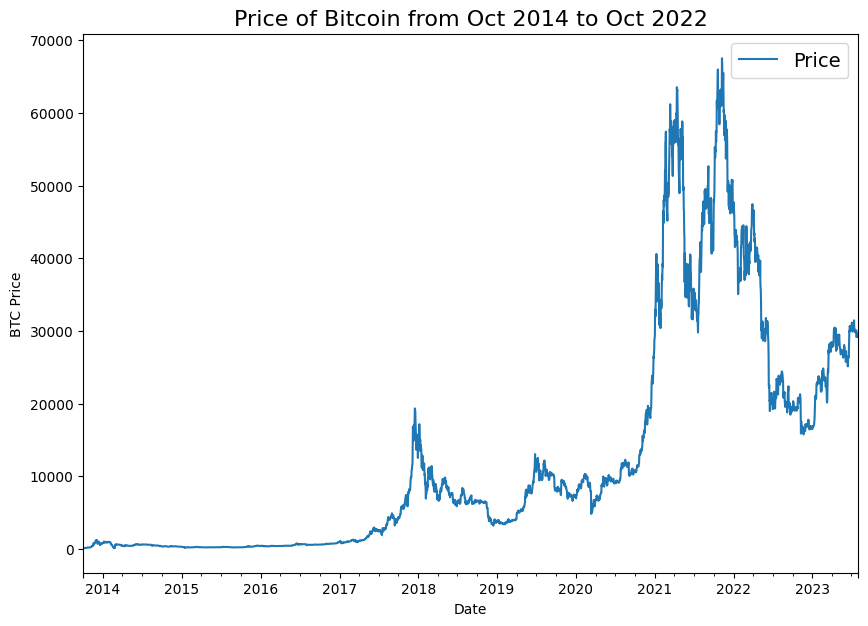

In [15]:
# Visualize closing prices
import matplotlib.pyplot as plt

btc_prices.plot(figsize=(10, 7))
plt.ylabel('BTC Price')
plt.title('Price of Bitcoin from Oct 2014 to Oct 2022', fontsize=16)
plt.legend(fontsize=14);

In [16]:
# Sort ascending order of prices
btc_prices.sort_values('Date', inplace=True)
btc_prices.head()

,Price
Date,
2013-10-01,140.300003
2013-10-02,123.000000
2013-10-03,130.990005
2013-10-04,136.820007
2013-10-05,136.699997


In [17]:
timesteps = btc_prices.index.to_numpy()
prices = btc_prices['Price'].to_numpy()

In [18]:
timesteps, prices

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', ...,
        '2023-07-30T00:00:00.000000000', '2023-07-31T00:00:00.000000000',
        '2023-08-01T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([  140.30000305,   123.        ,   130.99000549, ...,
        29281.73046875, 29232.38867188, 29712.16796875]))

In [19]:
# Create sequential splits at a specified point (80% train, 20% test)
split_size = int(.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2873,), (719,), (2873,), (719,))

In [20]:
# Create a helper plotting function
def plot_time_series(timesteps, prices, format='.', start=0, end=None, label=None):
    plt.plot(timesteps[start:end], prices[start:end], format, label=label)
    plt.xlabel('Date')
    plt.ylabel('Price')
    if label:
        plt.legend(fontsize=14)

    # Display a grid for easier measurement readings
    plt.grid(True)

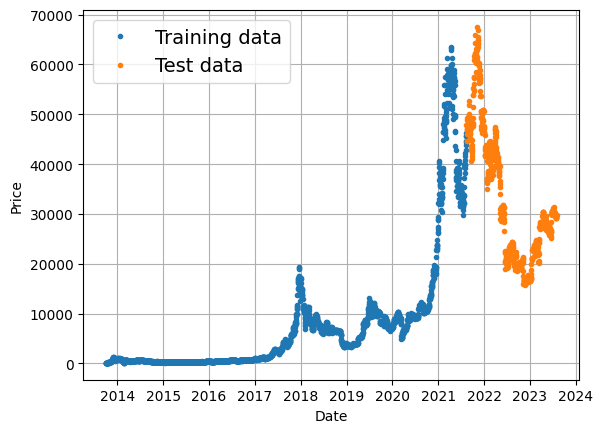

In [21]:
plot_time_series(X_train, y_train, label='Training data')
plot_time_series(X_test, y_test, label='Test data')

### Create windowed train & test sets

**Phase 01 - Horizon 1; Window 7**

In [22]:
# predict 1 step at a time
HORIZON = 1

# use a week worth of timesteps to predict the horizon
WINDOW_SIZE = 7

In [23]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
    return x[:, :-horizon], x[:, -horizon:]

In [24]:
# Create a function to make windows across entire time series
def make_windows(x, window_size=7, horizon=1):
    # Create a window of specific window_size
    window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)
    
    # Create a 2D array of multiple window steps
    window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T
    
    windowed_array = x[window_indexes]
    
    windows, labels = get_labelled_windows(windowed_array, horizon)
    return windows, labels

In [25]:
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)

In [26]:
full_windows, full_labels

(array([[  140.30000305,   123.        ,   130.99000549, ...,
           136.69999695,   137.80000305,   135.80000305],
        [  123.        ,   130.99000549,   136.82000732, ...,
           137.80000305,   135.80000305,   136.49000549],
        [  130.99000549,   136.82000732,   136.69999695, ...,
           135.80000305,   136.49000549,   139.5       ],
        ...,
        [30085.9296875 , 29178.06445312, 29228.60742188, ...,
         29222.72460938, 29315.0234375 , 29353.50976562],
        [29178.06445312, 29228.60742188, 29352.23046875, ...,
         29315.0234375 , 29353.50976562, 29281.73046875],
        [29228.60742188, 29352.23046875, 29222.72460938, ...,
         29353.50976562, 29281.73046875, 29232.38867188]]),
 array([[  136.49000549],
        [  139.5       ],
        [  140.41000366],
        ...,
        [29281.73046875],
        [29232.38867188],
        [29712.16796875]]))

In [27]:
def make_train_test_splits(windows, labels, test_split=.2):
    split_size = int(len(windows) * (1 - test_split)) # 80%
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [28]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2868, 717, 2868, 717)

### Attempt model training

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOW_SIZE)),
    
    # Expand dimensions to align with required input shape
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.RNN(LTSCell(32), time_major=True),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

2023-09-10 12:57:44.647223: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


2023-09-10 12:57:44.718732: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-10 12:57:44.720434: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-10 12:57:44.724827: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-10 12:57:44.727654: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least on

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 1, 7)              0         
                                                                 
 rnn (RNN)                   (1, 32)                   5072      
                                                                 
 dense (Dense)               (1, 1)                    33        
                                                                 
Total params: 5,105
Trainable params: 5,105
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(
        learning_rate = .01,
        clipvalue=.5
    ),
    loss = tf.keras.losses.MAE,
    metrics = ['mae', 'mse']
)

history_1 = model.fit(
    train_windows,
    train_labels,
    epochs=10,
)

Epoch 1/10


2023-09-10 12:58:08.965822: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x55e20d4422b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-10 12:58:08.965870: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2023-09-10 12:58:09.179835: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-10 12:58:10.677252: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


90/90 [==============================] - 66s 467ms/step - loss: 6893.5591 - mae: 6893.5591 - mse: 170733536.0000
Epoch 2/10
90/90 [==============================] - 44s 491ms/step - loss: 6785.3481 - mae: 6785.3481 - mse: 159206592.0000
Epoch 3/10
90/90 [==============================] - 44s 489ms/step - loss: 6782.9497 - mae: 6782.9497 - mse: 158658144.0000
Epoch 4/10
90/90 [==============================] - 44s 491ms/step - loss: 6778.4312 - mae: 6778.4312 - mse: 158521296.0000
Epoch 5/10
90/90 [==============================] - 42s 465ms/step - loss: 6793.9287 - mae: 6793.9287 - mse: 160704224.0000
Epoch 6/10
90/90 [==============================] - 44s 491ms/step - loss: 6776.5566 - mae: 6776.5566 - mse: 159017632.0000
Epoch 7/10
90/90 [==============================] - 44s 490ms/step - loss: 6788.2642 - mae: 6788.2642 - mse: 159959936.0000
Epoch 8/10
90/90 [==============================] - 42s 466ms/step - loss: 6783.9463 - mae: 6783.9463 - mse: 158630816.0000
Epoch 9/10
90/90 [=

Gradient explosion occurs - Add LSTM layer

### Experiments
train for less number of epochs for faster experimentation

**Model 2 - LTS, LSTM - activation tanh**

In [32]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOW_SIZE)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.RNN(LTSCell(128), time_major=True, return_sequences=True),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

In [33]:
model_2.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = .01),
    loss = tf.keras.losses.MAE,
    metrics = ['mae', 'mse']
)

In [34]:
history_2 = model_2.fit(
    train_windows,
    train_labels,
    epochs=10,
)

Epoch 1/10


2023-09-10 13:05:46.001679: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8200


90/90 [==============================] - 67s 514ms/step - loss: 7462.5190 - mae: 7462.5190 - mse: 198685104.0000
Epoch 2/10
90/90 [==============================] - 46s 512ms/step - loss: 7413.8027 - mae: 7413.8027 - mse: 197959504.0000
Epoch 3/10
90/90 [==============================] - 46s 513ms/step - loss: 7365.4604 - mae: 7365.4604 - mse: 197252736.0000
Epoch 4/10
90/90 [==============================] - 44s 492ms/step - loss: 7317.7314 - mae: 7317.7314 - mse: 196545888.0000
Epoch 5/10
90/90 [==============================] - 46s 512ms/step - loss: 7271.2349 - mae: 7271.2349 - mse: 195846544.0000
Epoch 6/10
90/90 [==============================] - 46s 515ms/step - loss: 7231.9478 - mae: 7231.9478 - mse: 195195792.0000
Epoch 7/10
90/90 [==============================] - 46s 512ms/step - loss: 7199.3047 - mae: 7199.3047 - mse: 194603968.0000
Epoch 8/10
90/90 [==============================] - 44s 490ms/step - loss: 7169.5215 - mae: 7169.5215 - mse: 194029056.0000
Epoch 9/10
90/90 [=

**Model 3 - LTS, LSTM - activation relu**

In [35]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOW_SIZE)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.RNN(LTSCell(128), time_major=True, return_sequences=True),
    tf.keras.layers.LSTM(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

In [36]:
model_3.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = .01),
    loss = tf.keras.losses.MAE,
    metrics = ['mae', 'mse']
)

In [37]:
history_3 = model_3.fit(
    train_windows,
    train_labels,
    epochs=10,
)

Epoch 1/10
90/90 [==============================] - 64s 512ms/step - loss: 6888.3447 - mae: 6888.3447 - mse: 169146000.0000
Epoch 2/10
90/90 [==============================] - 46s 512ms/step - loss: 6880.3633 - mae: 6880.3633 - mse: 171088144.0000
Epoch 3/10
90/90 [==============================] - 44s 488ms/step - loss: 6884.0015 - mae: 6884.0015 - mse: 169004416.0000
Epoch 4/10
90/90 [==============================] - 46s 511ms/step - loss: 6848.3237 - mae: 6848.3237 - mse: 165710864.0000
Epoch 5/10
90/90 [==============================] - 46s 510ms/step - loss: 6826.2202 - mae: 6826.2202 - mse: 165447504.0000
Epoch 6/10
90/90 [==============================] - 46s 510ms/step - loss: 6838.7656 - mae: 6838.7656 - mse: 166126320.0000
Epoch 7/10
90/90 [==============================] - 45s 499ms/step - loss: 6809.0142 - mae: 6809.0142 - mse: 164104288.0000
Epoch 8/10
90/90 [==============================] - 44s 484ms/step - loss: 6828.7983 - mae: 6828.7983 - mse: 167634752.0000
Epoch 9/

LSTM with ReLU activation performs better - moving forward with ReLU

**Model 4 - Two LTS layers, LSTM**

In [38]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOW_SIZE)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.RNN(LTSCell(128), time_major=True, return_sequences=True),
    tf.keras.layers.RNN(LTSCell(128), time_major=True, return_sequences=True),
    tf.keras.layers.LSTM(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

In [39]:
model_4.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = .01),
    loss = tf.keras.losses.MAE,
    metrics = ['mae', 'mse']
)

In [40]:
history_4 = model_4.fit(
    train_windows,
    train_labels,
    epochs=10,
)

Epoch 1/10
90/90 [==============================] - 127s 1s/step - loss: 6940.3711 - mae: 6940.3711 - mse: 172123968.0000
Epoch 2/10
90/90 [==============================] - 89s 989ms/step - loss: 6946.7847 - mae: 6946.7847 - mse: 172754368.0000
Epoch 3/10
90/90 [==============================] - 91s 1s/step - loss: 6902.0215 - mae: 6902.0215 - mse: 169984384.0000
Epoch 4/10
90/90 [==============================] - 89s 988ms/step - loss: 6947.1665 - mae: 6947.1665 - mse: 173420064.0000
Epoch 5/10
90/90 [==============================] - 91s 1s/step - loss: 6898.2607 - mae: 6898.2607 - mse: 171056736.0000
Epoch 6/10
90/90 [==============================] - 89s 992ms/step - loss: 6896.0864 - mae: 6896.0864 - mse: 169967264.0000
Epoch 7/10
90/90 [==============================] - 91s 1s/step - loss: 6918.1348 - mae: 6918.1348 - mse: 170784640.0000
Epoch 8/10
90/90 [==============================] - 89s 988ms/step - loss: 6893.2202 - mae: 6893.2202 - mse: 170904688.0000
Epoch 9/10
90/90 [=

Seems like more LTC cells do not make a difference

**Model 5 - LTS, Two LSTM layers**

In [41]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOW_SIZE)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.RNN(LTSCell(128), time_major=True, return_sequences=True),
    tf.keras.layers.LSTM(128, activation='relu', time_major=True, return_sequences=True),
    tf.keras.layers.LSTM(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

In [42]:
model_5.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = .01),
    loss = tf.keras.losses.MAE,
    metrics = ['mae', 'mse']
)

In [43]:
history_5 = model_5.fit(
    train_windows,
    train_labels,
    epochs=10,
)

Epoch 1/10
90/90 [==============================] - 66s 502ms/step - loss: 7133.1787 - mae: 7133.1787 - mse: 180853280.0000
Epoch 2/10
90/90 [==============================] - 47s 524ms/step - loss: 6877.8848 - mae: 6877.8848 - mse: 169219200.0000
Epoch 3/10
90/90 [==============================] - 46s 515ms/step - loss: 6826.9614 - mae: 6826.9614 - mse: 165142944.0000
Epoch 4/10
90/90 [==============================] - 46s 509ms/step - loss: 6988.9810 - mae: 6988.9810 - mse: 171005856.0000
Epoch 5/10
90/90 [==============================] - 45s 505ms/step - loss: 6926.8325 - mae: 6926.8325 - mse: 172134800.0000
Epoch 6/10
90/90 [==============================] - 44s 488ms/step - loss: 6859.1304 - mae: 6859.1304 - mse: 170289040.0000
Epoch 7/10
90/90 [==============================] - 46s 512ms/step - loss: 6910.6729 - mae: 6910.6729 - mse: 169453040.0000
Epoch 8/10
90/90 [==============================] - 46s 507ms/step - loss: 6854.4302 - mae: 6854.4302 - mse: 170132704.0000
Epoch 9/

More LSTM layers do not make a difference either

**Model 6 - Two LTS layers, Two LSTM layers**

In [44]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOW_SIZE)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.RNN(LTSCell(128), time_major=True, return_sequences=True),
    tf.keras.layers.RNN(LTSCell(128), time_major=True, return_sequences=True),
    tf.keras.layers.LSTM(128, activation='relu', time_major=True, return_sequences=True),
    tf.keras.layers.LSTM(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

In [45]:
model_6.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = .01),
    loss = tf.keras.losses.MAE,
    metrics = ['mae', 'mse']
)

In [46]:
history_6 = model_6.fit(
    train_windows,
    train_labels,
    epochs=10,
)

Epoch 1/10
90/90 [==============================] - 133s 1s/step - loss: 7726.3760 - mae: 7726.3760 - mse: 207947376.0000
Epoch 2/10
90/90 [==============================] - 91s 1s/step - loss: 6915.7461 - mae: 6915.7461 - mse: 173516848.0000
Epoch 3/10
90/90 [==============================] - 93s 1s/step - loss: 6869.1108 - mae: 6869.1108 - mse: 171252448.0000
Epoch 4/10
90/90 [==============================] - 91s 1s/step - loss: 6829.2202 - mae: 6829.2202 - mse: 164987424.0000
Epoch 5/10
90/90 [==============================] - 93s 1s/step - loss: 6832.6602 - mae: 6832.6602 - mse: 166790384.0000
Epoch 6/10
90/90 [==============================] - 91s 1s/step - loss: 6813.1626 - mae: 6813.1626 - mse: 164174944.0000
Epoch 7/10
90/90 [==============================] - 93s 1s/step - loss: 6829.3550 - mae: 6829.3550 - mse: 163422272.0000
Epoch 8/10
90/90 [==============================] - 92s 1s/step - loss: 6820.6528 - mae: 6820.6528 - mse: 161782192.0000
Epoch 9/10
90/90 [=============

More  of both layers do not make a difference either - return to base

### Tune hyperparameters

Epochs and learning rate can be tuned by keras callbacks. Therefore, only batch size, optimization function, and hidden units are required to tune

**Update hidden units (multiples of 32 are preferred)**

In [47]:
model_7 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOW_SIZE)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.RNN(LTSCell(32), time_major=True, return_sequences=True),
    tf.keras.layers.LSTM(32, activation='relu'),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

In [48]:
model_7.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = .01),
    loss = tf.keras.losses.MAE,
    metrics = ['mae', 'mse']
)

In [49]:
history_7 = model_7.fit(
    train_windows,
    train_labels,
    epochs=10,
)

Epoch 1/10
90/90 [==============================] - 63s 486ms/step - loss: 6926.3047 - mae: 6926.3047 - mse: 172948816.0000
Epoch 2/10
90/90 [==============================] - 44s 481ms/step - loss: 6880.4526 - mae: 6880.4526 - mse: 169352944.0000
Epoch 3/10
90/90 [==============================] - 45s 495ms/step - loss: 6931.8506 - mae: 6931.8506 - mse: 172097680.0000
Epoch 4/10
90/90 [==============================] - 44s 494ms/step - loss: 6873.1992 - mae: 6873.1992 - mse: 171140624.0000
Epoch 5/10
90/90 [==============================] - 42s 472ms/step - loss: 6913.3325 - mae: 6913.3325 - mse: 172689936.0000
Epoch 6/10
90/90 [==============================] - 45s 499ms/step - loss: 6885.3081 - mae: 6885.3081 - mse: 168633824.0000
Epoch 7/10
90/90 [==============================] - 45s 498ms/step - loss: 6869.8892 - mae: 6869.8892 - mse: 169854320.0000
Epoch 8/10
90/90 [==============================] - 45s 498ms/step - loss: 37073.4805 - mae: 37073.4805 - mse: 142994423808.0000
Epo

128 and 32 is very similar - moving forward with 32 as it trains faster

**Update batch size**

In [50]:
model_8 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOW_SIZE)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.RNN(LTSCell(32), time_major=True, return_sequences=True),
    tf.keras.layers.LSTM(32, activation='relu'),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

In [51]:
model_8.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = .01),
    loss = tf.keras.losses.MAE,
    metrics = ['mae', 'mse']
)

In [52]:
history_8 = model_8.fit(
    train_windows,
    train_labels,
    batch_size=128,
    epochs=10,
)

Epoch 1/10
23/23 [==============================] - 62s 2s/step - loss: 7050.2427 - mae: 7050.2427 - mse: 179967648.0000
Epoch 2/10
23/23 [==============================] - 45s 2s/step - loss: 6891.7690 - mae: 6891.7690 - mse: 172234976.0000
Epoch 3/10
23/23 [==============================] - 44s 2s/step - loss: 6909.8076 - mae: 6909.8076 - mse: 169613344.0000
Epoch 4/10
23/23 [==============================] - 42s 2s/step - loss: 6859.8906 - mae: 6859.8906 - mse: 168954752.0000
Epoch 5/10
23/23 [==============================] - 44s 2s/step - loss: 6878.2358 - mae: 6878.2358 - mse: 169209584.0000
Epoch 6/10
23/23 [==============================] - 44s 2s/step - loss: 6817.3042 - mae: 6817.3042 - mse: 165616448.0000
Epoch 7/10
23/23 [==============================] - 44s 2s/step - loss: 6930.7715 - mae: 6930.7715 - mse: 174194816.0000
Epoch 8/10
23/23 [==============================] - 42s 2s/step - loss: 6919.5732 - mae: 6919.5732 - mse: 169415856.0000
Epoch 9/10
23/23 [==============

Issues with batch size 128, default 32 is better

**Update window size**

In [53]:
HORIZON = 1
WINDOW_SIZE = 30

In [54]:
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2849, 713, 2849, 713)

In [55]:
model_9 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOW_SIZE)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.RNN(LTSCell(32), time_major=True, return_sequences=True),
    tf.keras.layers.LSTM(32, activation='relu'),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

In [56]:
model_9.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = .01),
    loss = tf.keras.losses.MAE,
    metrics = ['mae', 'mse']
)

In [57]:
history_9 = model_9.fit(
    train_windows,
    train_labels,
    epochs=10,
)

Epoch 1/10
90/90 [==============================] - 64s 502ms/step - loss: 7118.9688 - mae: 7118.9688 - mse: 183480752.0000
Epoch 2/10
90/90 [==============================] - 46s 506ms/step - loss: 6963.3599 - mae: 6963.3599 - mse: 170675136.0000
Epoch 3/10
90/90 [==============================] - 43s 477ms/step - loss: 6945.8296 - mae: 6945.8296 - mse: 172977280.0000
Epoch 4/10
90/90 [==============================] - 44s 495ms/step - loss: 6969.1021 - mae: 6969.1021 - mse: 171922336.0000
Epoch 5/10
90/90 [==============================] - 45s 500ms/step - loss: 6992.6445 - mae: 6992.6445 - mse: 174226784.0000
Epoch 6/10
90/90 [==============================] - 44s 493ms/step - loss: 6982.1089 - mae: 6982.1089 - mse: 172568176.0000
Epoch 7/10
90/90 [==============================] - 43s 469ms/step - loss: 7020.1650 - mae: 7020.1650 - mse: 172886944.0000
Epoch 8/10
90/90 [==============================] - 44s 493ms/step - loss: 6976.3286 - mae: 6976.3286 - mse: 172658144.0000
Epoch 9/

Window size of 7 is better

### Complete training

**Create callback functions**

In [58]:
# Model checkpoint with a specific filename
def create_model_checkpoint(model_name, save_path='model_checkpoints', monitor_dataset_loss=False):
    return tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(save_path, model_name),
        verbose=0,
        save_best_only=True,
        #monitor='loss' if monitor_dataset_loss else 'val_loss',
        monitor='loss'
    )

# Create a tensorboard callback
def create_tensorboard_callback(dir_name, experiment_name):
    log_dir = dir_name + '/' + experiment_name + '/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
    tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
    )

    print(f'Saving TensorBoard log files to: {log_dir}')
    return tensorboard_callback

# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    patience=200,
    restore_best_weights=True
)

# create reduce lr on plateau callback
reduce_lr_plateau = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='loss',
    patience=100,
    verbose=1
)

In [59]:
HORIZON = 1
WINDOW_SIZE = 7

In [60]:
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2868, 717, 2868, 717)

In [61]:
model_10 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOW_SIZE)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.RNN(LTSCell(32), time_major=True, return_sequences=True),
    tf.keras.layers.LSTM(32, activation='relu'),
    tf.keras.layers.Dense(HORIZON, activation='linear')
], name='model_10')

In [62]:
model_10.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = .01),
    loss = tf.keras.losses.MAE,
    metrics = ['mae', 'mse']
)

In [63]:
history_10 = model_10.fit(
    train_windows,
    train_labels,
    epochs=250,
    callbacks=[
        create_model_checkpoint(model_name=model_10.name),
        create_tensorboard_callback(
            dir_name='tensorboard_logs/tensorboard_logs_model_10',
            experiment_name='model_10'
        ),
        early_stopping,
        reduce_lr_plateau,
        
    ]
)

Saving TensorBoard log files to: tensorboard_logs/tensorboard_logs_model_10/model_10/20230910-142359
Epoch 1/250
90/90 [==============================] - ETA: 0s - loss: 6939.6172 - mae: 6939.6172 - mse: 172377760.0000INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7eff44f0f710>, 139656178041680), {}).
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7eff44f26810>, 139656178106816), {}).
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7eff44f0f710>, 139656178041680), {}).
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='grad